In [61]:
import json
import csv
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

In [74]:
ten_df = pd.read_csv('10ftnew.csv') #loading sample data (small portion of 10ft data)
twenty_df = pd.read_csv('20ftnew.csv')
#print list(initial_df)
#print initial_df


## Finding the position vector
If P is the point with coordinates (x, y, z) then the length, or magnitude, of the position vector
OP is given by the formula: 
### |OP|= sqrt(x^2 + y^2 + z^2)

Source: http://www.mathcentre.ac.uk/resources/uploaded/mc-ty-cartesian1-2009-1.pdf

In [80]:
def square(x):
    return x**2

def positionVector(x, y, z):
    x = square(x)
    y = square(y)
    z = square(z)
    return(abs(sqrt(x + y+ z))) 

final_ten_df = pd.DataFrame(columns=['sumGyro', 'sumAcc', 'sumMag'])
for index, row in ten_df.iterrows():
    final_ten_df.at[index,'sumGyro'] = positionVector(row['GyroX'], row['GyroY'], row['GyroZ']) #get OP of Gyro
    final_ten_df.at[index,'sumAcc'] = positionVector(row['AccX'], row['AccY'], row['AccZ']) #get OP of Acc
    final_ten_df.at[index,'sumMag'] = positionVector(row['MagX'], row['MagY'], row['MagZ']) #get OP of Mag
    
final_twenty_df = pd.DataFrame(columns=['sumGyro', 'sumAcc', 'sumMag'])
for index, row in twenty_df.iterrows():
    final_twenty_df.at[index,'sumGyro'] = positionVector(row['GyroX'], row['GyroY'], row['GyroZ']) #get OP of Gyro
    final_twenty_df.at[index,'sumAcc'] = positionVector(row['AccX'], row['AccY'], row['AccZ']) #get OP of Acc
    final_twenty_df.at[index,'sumMag'] = positionVector(row['MagX'], row['MagY'], row['MagZ']) #get OP of Mag

In [81]:
print final_ten_df
print final_twenty_df

       sumGyro    sumAcc   sumMag
0     0.445895   1.07087   85.354
1     0.417076    1.0479  85.2641
2     0.371987   1.00033  85.0701
3     0.343701  0.980807  84.9472
4     0.339097  0.963115  84.9472
5     0.388344  0.963115  84.8608
6     0.377098  0.973397   85.096
7     0.274325   1.00842  85.0526
8     0.184159   1.00842  85.1921
9     0.168525   1.00823  84.7991
10    0.186263   1.03993  85.1434
11    0.168755   1.03755  85.0222
12    0.217078  0.987522  84.9364
13    0.258594  0.987522  85.2747
14    0.216803   1.03938   85.052
15    0.144004   1.04336  85.0008
16   0.0396949   1.04336  85.0008
17   0.0413028   0.99412  85.2068
18   0.0898772  0.977028  84.9668
19    0.159625   0.98857  84.9319
20    0.193957   1.01887  84.9676
21    0.170218   1.03913  84.8811
22    0.159784   1.03869  84.8811
23    0.167326   1.03777  84.8001
24    0.178043    1.0495  84.8538
25    0.178043    1.0349  84.8339
26    0.220505   1.02769  85.0184
27    0.241089   1.04419  84.8719
28    0.257218

In [83]:
print "10 ft data"
print "sum of Gyro: "+ str(final_ten_df['sumGyro'].sum())
print "sum of Acc: "+ str(final_ten_df['sumAcc'].sum())
print "sum of Mag: "+ str(final_ten_df['sumMag'].sum())

print "20 ft data"
print "sum of Gyro: "+ str(final_twenty_df['sumGyro'].sum())
print "sum of Acc: "+ str(final_twenty_df['sumAcc'].sum())
print "sum of Mag: "+ str(final_twenty_df['sumMag'].sum())

10 ft data
sum of Gyro: 327.26555458
sum of Acc: 502.740077104
sum of Mag: 39195.9186466
20 ft data
sum of Gyro: 671.199050884
sum of Acc: 1097.8500433
sum of Mag: 88298.0556886


# Next Steps: 
- Use the pivot point to separate data into two paths
- Calculate the position vectors for both paths
- Find the error for the two paths


In [99]:
#final_ten_df.reset_index(inplace = True)
final__ten_df = final_ten_df.drop('index', 1)
#print final_ten_df

#final_twenty_df.reset_index(inplace = True)
final__twenty_df = final_twenty_df.drop('index', 1)
#print final_twenty_df

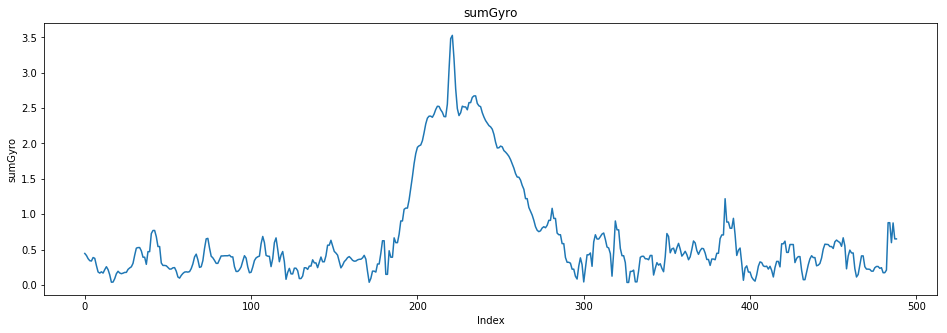

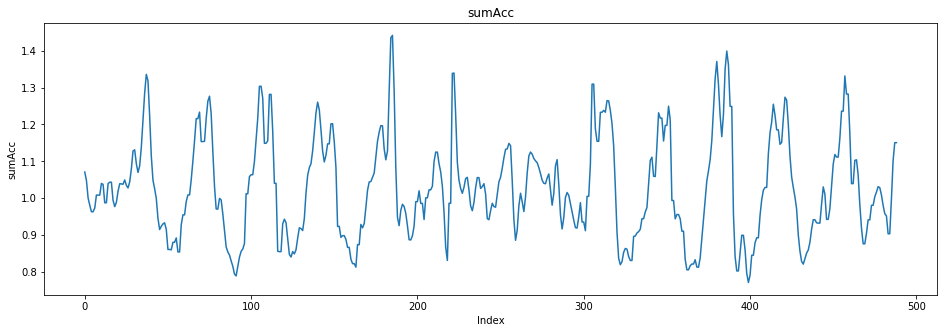

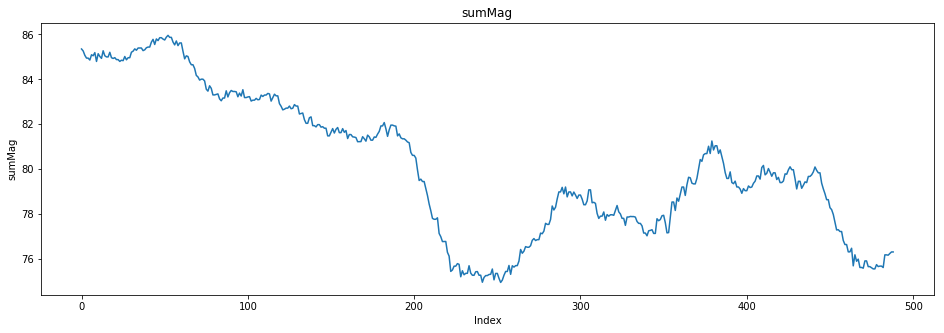

In [100]:
sumGyro = final_ten_df['sumGyro']
sumAcc = final_ten_df['sumAcc']
sumMag = final_ten_df['sumMag']
index = final_ten_df['level_0']

plt.figure(figsize=(16,5))
plt.plot(index, sumGyro)
plt.title('sumGyro')
plt.xlabel('Index')
plt.ylabel('sumGyro')
plt.show()

plt.figure(figsize=(16,5))
plt.plot(index, sumAcc)
plt.title('sumAcc')
plt.xlabel('Index')
plt.ylabel('sumAcc')
plt.show()

plt.figure(figsize=(16,5))
plt.plot(index, sumMag)
plt.title('sumMag')
plt.xlabel('Index')
plt.ylabel('sumMag')
plt.show()

In [107]:
print final_ten_df.describe()
print final_ten_df[final_ten_df['sumGyro']==final_ten_df['sumGyro'].max()]
print final_ten_df[final_ten_df['sumMag']==final_ten_df['sumMag'].min()]

          level_0       index
count  489.000000  489.000000
mean   244.000000  244.000000
std    141.306405  141.306405
min      0.000000    0.000000
25%    122.000000  122.000000
50%    244.000000  244.000000
75%    366.000000  366.000000
max    488.000000  488.000000
     level_0  index  sumGyro   sumAcc  sumMag
221      221    221  3.52756  1.33875  76.129
     level_0  index  sumGyro   sumAcc   sumMag
252      252    252  1.89931  1.10961  74.9542


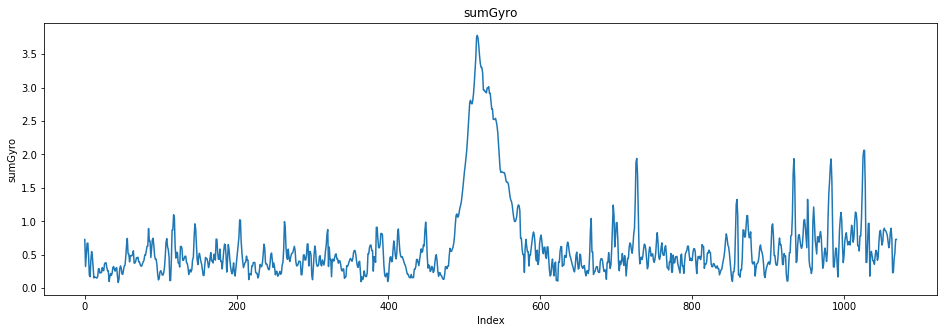

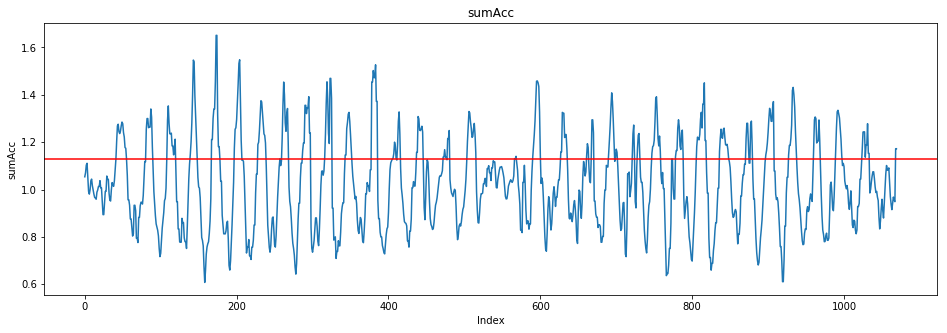

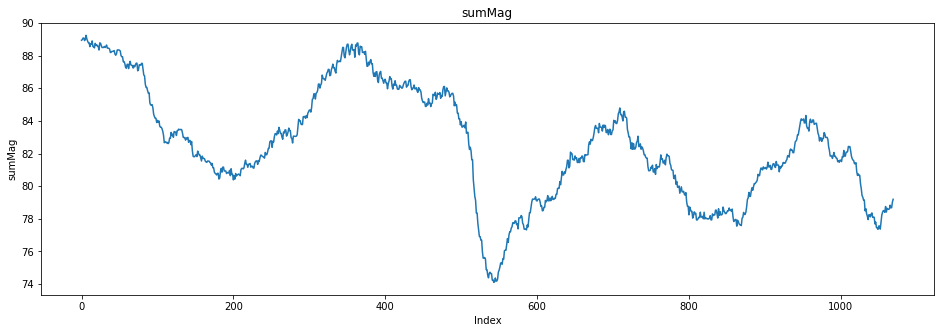

In [141]:
sumGyro = final_twenty_df['sumGyro']
sumAcc = final_twenty_df['sumAcc']
sumMag = final_twenty_df['sumMag']
index = final_twenty_df['index']

plt.figure(figsize=(16,5))
plt.plot(index, sumGyro)
plt.title('sumGyro')
plt.xlabel('Index')
plt.ylabel('sumGyro')
plt.show()

plt.figure(figsize=(16,5))
plt.plot(index, sumAcc)
plt.axhline(y=avgAcc, color='r', linestyle='-')
plt.title('sumAcc')
plt.xlabel('Index')
plt.ylabel('sumAcc')
plt.show()

plt.figure(figsize=(16,5))
plt.plot(index, sumMag)
plt.title('sumMag')
plt.xlabel('Index')
plt.ylabel('sumMag')
plt.show()

In [108]:
print final_twenty_df.describe()
print final_twenty_df[final_twenty_df['sumGyro']==final_twenty_df['sumGyro'].max()]
print final_twenty_df[final_twenty_df['sumMag']==final_twenty_df['sumMag'].min()]

             index
count  1070.000000
mean    534.500000
std     309.026698
min       0.000000
25%     267.250000
50%     534.500000
75%     801.750000
max    1069.000000
     index  sumGyro    sumAcc   sumMag
517    517  3.78233  0.911851  79.9011
     index  sumGyro   sumAcc   sumMag
543    543  2.42654  1.00664  74.1042
   index   sumGyro    sumAcc   sumMag
6      6  0.194089  0.980504  89.2368


In [142]:
#find midline of acceleration modulated sine curve
maxAcc = final_twenty_df[final_twenty_df['sumAcc']==final_twenty_df['sumAcc'].max()]
minAcc = final_twenty_df[final_twenty_df['sumAcc']==final_twenty_df['sumAcc'].min()]
avgAcc = float(list(minAcc['sumAcc'])[0] + list(maxAcc['sumAcc'])[0])/2
print avgAcc

1.1293853524


# Moving Forward

Next, we will use the range given to us by the max sumGyro row and the min sumMag row to split the data in half. 

##### Example: for 10ft data, we the turning/midpoint happens between row 221 and 252. We will cut this piece out of our data. Every row before 221, exclusive, will be the first half of our travel. Everything after 252, exclusive, will be the second half. 

##### Example: for 20ft data, we need to exclude the rows from 517 to 543. 


The result will be two seperate csv files/dataframes for each dataset. We will compute for the position vectors for each and find the difference which will be the error. 